# VIZ PREMIERS GRAPHS ENTREPRISES #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

### Création du dataframe ets ###

In [2]:
ets = pd.read_csv('./data/base_etablissement_par_tranche_effectif.csv')
ets.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


# Exploration Visuelle #

### Distribution du nombre d'entreprise par région ###

In [3]:
reg_total_ets = ets.groupby('REG', as_index=False).agg(Total_ets = ('E14TST', 'sum')).sort_values(by='Total_ets', ascending=False)

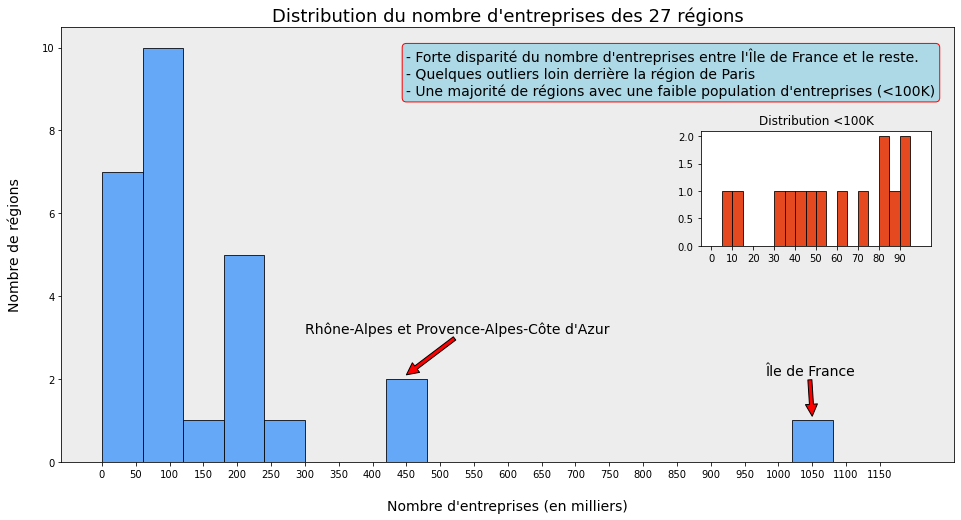

In [4]:
#Instanciation de la figure et de l'axe
fig = plt.figure(figsize=(16,8))
ax = plt.subplot(111)

#Création de l'histogramme principal
ax.hist(reg_total_ets.Total_ets, range=(0,1200000),bins=20, edgecolor='black', linewidth=0.8, color='#64A8F7')

#Configuration des axes et du titre
ax.set_ylabel('Nombre de régions', labelpad=20, fontsize=14)
ax.set_xlabel('Nombre d\'entreprises (en milliers)', labelpad=20, fontsize=14)
ax.set_title('Distribution du nombre d\'entreprises des 27 régions', fontsize=18)

#Ajout d'annotations et format des annotations
t = ax.annotate(text='Île de France', xy=(1050000, 1.1), xytext=(980000,2.1), arrowprops={'facecolor':'red'}), ax.annotate(text='Rhône-Alpes et Provence-Alpes-Côte d\'Azur', xy=(450000,2.1), xytext=(300000,3.1), arrowprops={'facecolor':'red'})
t2 = ax.text(s='- Forte disparité du nombre d\'entreprises entre l\'Île de France et le reste. \n- Quelques outliers loin derrière la région de Paris \n- Une majorité de régions avec une faible population d\'entreprises (<100K)', x=450000, y=10, ha="left", va="top", size=14, bbox=dict(boxstyle="round,pad=0.3",fc="lightblue", ec="red", lw=1))
plt.setp(t, fontsize=14)
plt.setp(t2, fontsize=14)

#Configuration de l'apparence générale du graphique
ax.grid(visible=False)
ax.set_facecolor('#ededed')

#Configuration des abscisses
x= np.arange(0,1200000,50000)
ax.set_xticks(x)
labels = [int(i / 1000) for i in x]
ax.set_xticklabels(labels = labels)

#Ajout d'un mini histogramme
ax2 = plt.axes([0.68, 0.50, 0.2, 0.2])
ax2.hist(reg_total_ets.Total_ets, range=(0,100000), bins=20, edgecolor='black', linewidth=0.8, color='#E5491F')
ax2.set_title('Distribution <100K')

#Configuration des abscisses du mini histogramme
x2 = np.arange(0,100000,10000)
labels2 = [int(i / 1000) for i in x2]
ax2.set_xticks(x2)
ax2.set_xticklabels(labels=labels2)

plt.show()




### Distribution du nombre d'entreprise par département ###

In [5]:
dep_total_ets = ets.groupby('DEP', as_index=False).agg(Total_ets = ('E14TST', 'sum')).sort_values(by='Total_ets', ascending=False)
dep_total_ets.head()

,DEP,Total_ets
75,75,427385
12,13,164883
69,69,136867
92,92,131528
59,59,129819


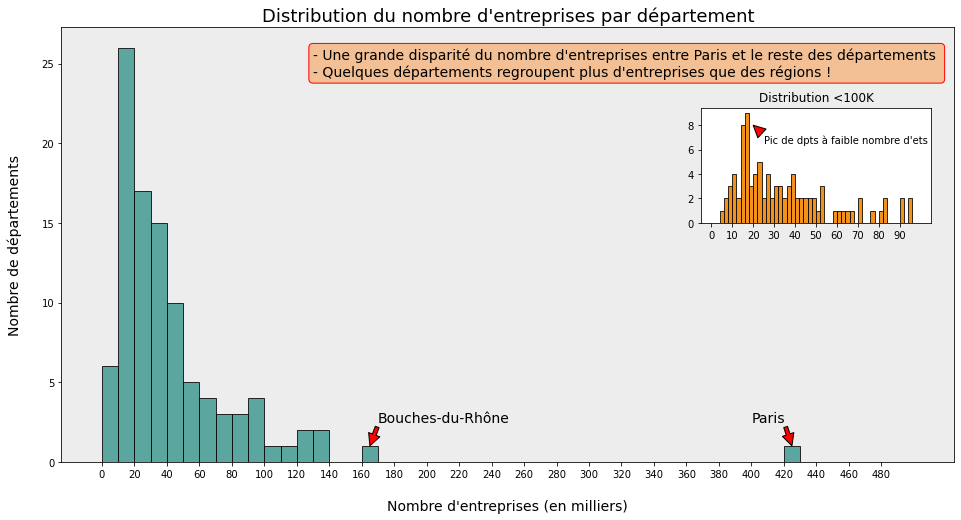

In [15]:
#Instanciation de la figure et de l'axe
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

#Création de l'histogramme principal
ax.hist(dep_total_ets.Total_ets, range=(0,500000), bins=50, edgecolor='black', linewidth=0.8, color='#5BA69E')

#Configuration des axes et du titre
ax.set_ylabel('Nombre de départements', labelpad=20, fontsize=14)
ax.set_xlabel('Nombre d\'entreprises (en milliers)', labelpad=20, fontsize=14)
ax.set_title('Distribution du nombre d\'entreprises par département', fontsize=18)

#Ajout d'annotations et format des annotations
t = ax.annotate('Paris', xy=(425000, 1), xytext=(400000, 2.5), arrowprops={'facecolor': 'red'}), ax.annotate('Bouches-du-Rhône', xy=(165000, 1), xytext=(170000, 2.5), arrowprops={'facecolor': 'red'})
t2 = ax.text(s='- Une grande disparité du nombre d\'entreprises entre Paris et le reste des départements \n- Quelques départements regroupent plus d\'entreprises que des régions ! ' , x=130000, y=26, ha="left", va="top", size=14, bbox=dict(boxstyle="round,pad=0.3",fc="#F2C094", ec="red", lw=1))
plt.setp(t, fontsize=14)
plt.setp(t2, fontsize=14)

#Configuration de l'apparence générale du graphique
ax.grid(visible=False)
ax.set_facecolor('#ededed')

#Configuration des abscisses
x = np.arange(0,500000,20000)
labels = [int(i / 1000) for i in x]
ax.set_xticks(x)
ax.set_xticklabels(rotation = 0, labels=labels)


#Ajout d'un mini histogramme
ax2 = plt.axes([0.68, 0.54, 0.2, 0.2])
ax2.hist(dep_total_ets.Total_ets, range=(0,100000), bins=50, edgecolor='black', linewidth=0.8, color='#F2911B')
ax2.set_title('Distribution <100K')

#Configuration des abscisses du mini histogramme
x2 = np.arange(0,100000,10000)
labels2 = [int(i / 1000) for i in x2]
ax2.set_xticks(x2)
ax2.set_xticklabels(labels=labels2)

#Ajout d'annotations dans le mini histogramme
t3 = ax2.annotate('Pic de dpts à faible nombre d\'ets', xy=(20000, 8), xytext=(25000, 6.5), arrowprops={'facecolor': 'red'})

plt.show()


### Taille des entreprises en France par ville ###

La région Île de France étant très nettement à part, nous l'isolons pour l'analyse en boîtes à moustache

In [7]:
ets_paris_in = ets[ets['REG'] == 11].reset_index(drop=True)
ets_paris_out = ets[ets['REG'] != 11].reset_index(drop=True)

On catégorise ensuite le dataset en quartiles pour le nombre total d'entreprises par commune

In [8]:

ets_paris_in['groupes_ets'] = pd.qcut(ets_paris_out.E14TST, q=[0.0,0.25,0.5,0.75,1.0], labels=['0 à 8 ets', '8 à 18 ets', '18 à 51 ets', 'plus de 51'])

ets_paris_out['groupes_ets'] = pd.qcut(ets_paris_out.E14TST, q=[0.0,0.25,0.5,0.75,1.0], labels=['0 à 8 ets', '8 à 18 ets', '18 à 51 ets', 'plus de 51'])



In [9]:
ets_paris_out['groupes_ets'].value_counts()

0 à 8 ets      9740
plus de 51     8755
18 à 51 ets    8579
8 à 18 ets     8326
Name: groupes_ets, dtype: int64

In [10]:
ets_paris_in['groupes_ets'].value_counts()

0 à 8 ets      477
8 à 18 ets     299
18 à 51 ets    276
plus de 51     229
Name: groupes_ets, dtype: int64

In [11]:
ets_paris_out.groupby('groupes_ets', as_index=False).agg(moyenne = ('E14TST', 'mean'), mediane = ('E14TST', 'median'), nombre = ('E14TST', 'count'))

,groupes_ets,moyenne,mediane,nombre
0,0 à 8 ets,4.512320,5.0,9740
1,8 à 18 ets,12.951477,13.0,8326
2,18 à 51 ets,30.853829,29.0,8579
3,plus de 51,349.944146,122.0,8755


In [12]:
ets_paris_in.groupby('groupes_ets', as_index=False).agg(moyenne = ('E14TST', 'mean'), mediane = ('E14TST', 'median'), nombre = ('E14TST', 'count'))

,groupes_ets,moyenne,mediane,nombre
0,0 à 8 ets,618.966457,108.0,477
1,8 à 18 ets,579.792642,80.0,299
2,18 à 51 ets,1851.739130,58.5,276
3,plus de 51,299.419214,55.0,229


In [13]:
#Renome les colonnes des tailles
ets_paris_out.columns = [
 'CODGEO',
 'LIBGEO',
 'REG',
 'DEP',
 'Total ets',
 '0/NA',
 '1 à 5',
 '6 à 9',
 '10 à 19',
 '20 à 49',
 '50 à 99',
 '100 à 199',
 '200 à 499',
 '500 et +',
'groupes_ets'
]

ets_paris_in.columns = [
 'CODGEO',
 'LIBGEO',
 'REG',
 'DEP',
 'Total ets',
 '0/NA',
 '1 à 5',
 '6 à 9',
 '10 à 19',
 '20 à 49',
 '50 à 99',
 '100 à 199',
 '200 à 499',
 '500 et +',
'groupes_ets'
]


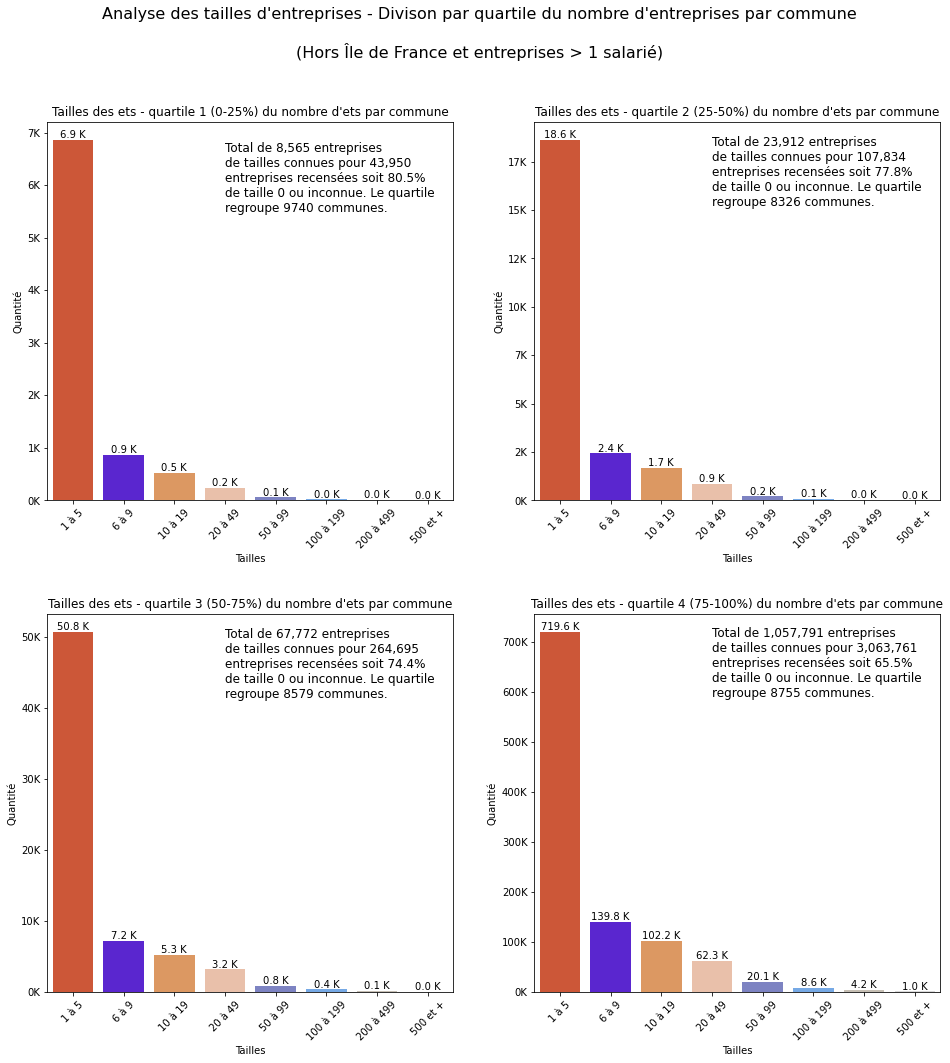

In [14]:
#Division du dataset (excl. Paris) en 4 datasets par quartile
quartile1 = ets_paris_out[ets_paris_out['groupes_ets'] == '0 à 8 ets'].reset_index(drop=True)
quartile2 = ets_paris_out[ets_paris_out['groupes_ets'] == '8 à 18 ets'].reset_index(drop=True)
quartile3 = ets_paris_out[ets_paris_out['groupes_ets'] == '18 à 51 ets'].reset_index(drop=True)
quartile4 = ets_paris_out[ets_paris_out['groupes_ets'] == 'plus de 51'].reset_index(drop=True)

q1_melt = pd.melt(frame=quartile1, 
                id_vars=['CODGEO','LIBGEO','REG','DEP'], 
                value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +'])

q2_melt = pd.melt(frame=quartile2, 
                id_vars=['CODGEO','LIBGEO','REG','DEP'], 
                value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +'])

q3_melt = pd.melt(frame=quartile3, 
                id_vars=['CODGEO','LIBGEO','REG','DEP'], 
                value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +'])


q4_melt = pd.melt(frame=quartile4, 
                id_vars=['CODGEO','LIBGEO','REG','DEP'], 
                value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +'])



fig, ax = plt.subplots(2,2, figsize=(16,16))
fig.suptitle("""Analyse des tailles d\'entreprises - Divison par quartile du nombre d'entreprises par commune
             \n(Hors Île de France et entreprises > 1 salarié)""", fontsize=16)

plt.subplots_adjust(hspace=0.3)

labels = q4_melt.variable.unique()
x = range(0, len(labels))

colors = ['#E5491F', '#4F0AEB', '#F0954E', '#F3BDA0', '#717ACE', '#64A8F7', '#C9C0B1', '#D9D9D9']
sns.set_palette(sns.color_palette(colors))

plt.subplot(221)
ax1 = sns.barplot(data=q1_melt, x='variable', y='value', estimator=sum, ci=None)
container_ax1 = ax1.containers[0]
container_labels = ["{:,.1f} K".format(i / 1000) for i in container_ax1.datavalues]
ax1.bar_label(container_ax1, labels=container_labels)
ax1.set_title('Tailles des ets - quartile 1 (0-25%) du nombre d\'ets par commune')
ax1.set_xlabel('Tailles')
ax1.set_ylabel('Quantité')
ax1.set_xticks(x)
ax1.set_xticklabels(labels= labels, rotation=45)
ax1.yaxis.set_major_formatter(lambda x, pos: str(int(x / 1000))+'K')
t = ax1.text(s='Total de '+ "{:,.0f}".format(q1_melt.value.sum()) 
             + ' entreprises \nde tailles connues pour ' 
             +  "{:,.0f}".format(quartile1['Total ets'].sum()) + '\nentreprises recensées soit '
             + "{:0.1f}".format(quartile1['0/NA'].sum() / quartile1['Total ets'].sum() *100)+'% \nde taille 0 ou inconnue. Le '
             + 'quartile  \nregroupe ' + str(len(quartile1)) + ' communes.', x=3, y=5500)
plt.setp(t, fontsize=12)

plt.subplot(222)
ax2 = sns.barplot(data=q2_melt, x='variable', y='value', estimator=sum, ci=None)
container_ax2 = ax2.containers[0]
container_labels = ["{:,.1f} K".format(i / 1000) for i in container_ax2.datavalues]
ax2.bar_label(container_ax2, labels=container_labels)
#ax2.bar_label(ax2.containers[0], fmt='%0.0f')
ax2.set_title('Tailles des ets - quartile 2 (25-50%) du nombre d\'ets par commune')
ax2.set_xlabel('Tailles')
ax2.set_ylabel('Quantité')
ax2.set_xticks(x)
ax2.set_xticklabels(labels= labels, rotation=45)
ax2.yaxis.set_major_formatter(lambda x, pos: str(int(x / 1000))+'K')
t = ax2.text(s='Total de '+ "{:,.0f}".format(q2_melt.value.sum()) 
             + ' entreprises \nde tailles connues pour ' 
             +  "{:,.0f}".format(quartile2['Total ets'].sum()) + '\nentreprises recensées soit '
             + "{:0.1f}".format(quartile2['0/NA'].sum() / quartile2['Total ets'].sum() *100)+'% \nde taille 0 ou inconnue. Le '
             + 'quartile  \nregroupe ' + str(len(quartile2)) + ' communes.', x=3, y=15200)
plt.setp(t, fontsize=12)

plt.subplot(223)
ax3 = sns.barplot(data=q3_melt, x='variable', y='value', estimator=sum, ci=None)
container_ax3 = ax3.containers[0]
container_labels = ["{:,.1f} K".format(i / 1000) for i in container_ax3.datavalues]
ax3.bar_label(container_ax3, labels=container_labels)
#ax3.bar_label(ax3.containers[0], fmt='%0.0f')
ax3.set_title('Tailles des ets - quartile 3 (50-75%) du nombre d\'ets par commune')
ax3.set_xlabel('Tailles')
ax3.set_ylabel('Quantité')
ax3.set_xticks(x)
ax3.set_xticklabels(labels= labels, rotation=45)
ax3.yaxis.set_major_formatter(lambda x, pos: str(int(x / 1000))+'K')
t = ax3.text(s='Total de '+ "{:,.0f}".format(q3_melt.value.sum()) 
             + ' entreprises \nde tailles connues pour ' 
             +  "{:,.0f}".format(quartile3['Total ets'].sum()) + '\nentreprises recensées soit '
             + "{:0.1f}".format(quartile3['0/NA'].sum() / quartile3['Total ets'].sum() *100)+'% \nde taille 0 ou inconnue. Le '
             + 'quartile  \nregroupe ' + str(len(quartile3)) + ' communes.', x=3, y=41500)
plt.setp(t, fontsize=12)

plt.subplot(224)
ax4 = sns.barplot(data=q4_melt, x='variable', y='value', estimator=sum, ci=None)
container_ax4 = ax4.containers[0]
container_labels = ["{:,.1f} K".format(i / 1000) for i in container_ax4.datavalues]
ax4.bar_label(container_ax4, labels=container_labels)
#ax4.bar_label(ax4.containers[0], fmt='%0.0f')
ax4.set_title('Tailles des ets - quartile 4 (75-100%) du nombre d\'ets par commune')
ax4.set_xlabel('Tailles')
ax4.set_ylabel('Quantité')
ax4.set_xticks(x)
ax4.set_xticklabels(labels= labels, rotation=45)
ax4.yaxis.set_major_formatter(lambda x, pos: str(int(x / 1000))+'K')
t = ax4.text(s='Total de '+ "{:,.0f}".format(q4_melt.value.sum()) 
             + ' entreprises \nde tailles connues pour ' 
             +  "{:,.0f}".format(quartile4['Total ets'].sum()) + '\nentreprises recensées soit '
             + "{:0.1f}".format(quartile4['0/NA'].sum() / quartile4['Total ets'].sum() *100)+'% \nde taille 0 ou inconnue. Le '
             + 'quartile  \nregroupe ' + str(len(quartile4)) + ' communes.', x=3, y=590000)
plt.setp(t, fontsize=12)

plt.show()